<a href="https://colab.research.google.com/github/wei-enwang/space-ham/blob/main/main_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import nltk
from nltk.corpus import words
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils import data
from preprocess import WholeData

import models
import utils

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/weinwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('words')

device = "cuda" if torch.cuda.is_available() else "cpu"
assert device == "cuda"   # use gpu whenever you can!

seed = 32
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

[nltk_data] Downloading package words to /home/weinwang/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
plot_yes = True

# use one dataset for now
train_data_dir = "./data/enron1/"
test_data_dir = "./data/enron2/"
output_dir = "./output/"

# hyperparameters
batch_size = 64
dropout = 0.5
learning_rate = 1e-4
epochs = 30
max_len = 80

In [4]:
vocab = set([str.lower() for str in words.words()])

train_dataset = WholeData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
test_dataset = WholeData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
w2idx = train_dataset.src_v2id

embed = utils.load_pretrained_vectors(w2idx, "fastText/crawl-300d-2M.vec")
embed = torch.tensor(embed)

Loading pretrained vectors...
234378


0it [00:00, ?it/s]

There are 75835 / 234379 pretrained vectors found.


In [5]:
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                                   num_workers=8, pin_memory=True)
test_dataloader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, 
                                  num_workers=8, pin_memory=True, drop_last=True)


In [6]:
model = models.spam_lstm(pretrained_embedding=embed, dropout=dropout).to(device)
loss_fn = nn.BCEWithLogitsLoss().to(device)
opt = Adam(model.parameters(), lr=learning_rate)

Using pretrained vectors...


  3%|▎         | 1/30 [00:06<03:09,  6.54s/it]

Epoch 0
-------------------------------
Training loss: 0.635107, avg accuracy: 0.439251
Testing loss: 0.549809, avg accuracy: 0.745021


  7%|▋         | 2/30 [00:13<03:02,  6.52s/it]

Epoch 1
-------------------------------
Training loss: 0.482825, avg accuracy: 0.780938
Testing loss: 0.331904, avg accuracy: 0.854567


 10%|█         | 3/30 [00:19<02:56,  6.52s/it]

Epoch 2
-------------------------------
Training loss: 0.296140, avg accuracy: 0.912111
Testing loss: 0.312727, avg accuracy: 0.882383


 13%|█▎        | 4/30 [00:26<02:49,  6.53s/it]

Epoch 3
-------------------------------
Training loss: 0.214817, avg accuracy: 0.942471
Testing loss: 0.326134, avg accuracy: 0.908826


 17%|█▋        | 5/30 [00:32<02:43,  6.53s/it]

Epoch 4
-------------------------------
Training loss: 0.148341, avg accuracy: 0.955306
Testing loss: 0.295451, avg accuracy: 0.894231


 20%|██        | 6/30 [00:39<02:36,  6.54s/it]

Epoch 5
-------------------------------
Training loss: 0.119254, avg accuracy: 0.964313
Testing loss: 0.287686, avg accuracy: 0.890282


 23%|██▎       | 7/30 [00:45<02:30,  6.54s/it]

Epoch 6
-------------------------------
Training loss: 0.106559, avg accuracy: 0.969151
Testing loss: 0.301902, avg accuracy: 0.901442


 27%|██▋       | 8/30 [00:52<02:23,  6.54s/it]

Epoch 7
-------------------------------
Training loss: 0.097032, avg accuracy: 0.972608
Testing loss: 0.273663, avg accuracy: 0.900412


 30%|███       | 9/30 [00:58<02:17,  6.55s/it]

Epoch 8
-------------------------------
Training loss: 0.099442, avg accuracy: 0.970249
Testing loss: 0.256107, avg accuracy: 0.906937


 33%|███▎      | 10/30 [01:05<02:10,  6.55s/it]

Epoch 9
-------------------------------
Training loss: 0.085985, avg accuracy: 0.975071
Testing loss: 0.285188, avg accuracy: 0.905391


 37%|███▋      | 11/30 [01:11<02:04,  6.55s/it]

Epoch 10
-------------------------------
Training loss: 0.083836, avg accuracy: 0.975264
Testing loss: 0.305979, avg accuracy: 0.899038


 40%|████      | 12/30 [01:18<01:57,  6.55s/it]

Epoch 11
-------------------------------
Training loss: 0.071928, avg accuracy: 0.981392
Testing loss: 0.316819, avg accuracy: 0.895261


 43%|████▎     | 13/30 [01:25<01:51,  6.54s/it]

Epoch 12
-------------------------------
Training loss: 0.066082, avg accuracy: 0.984138
Testing loss: 0.292357, avg accuracy: 0.912603


 47%|████▋     | 14/30 [01:31<01:44,  6.55s/it]

Epoch 13
-------------------------------
Training loss: 0.060703, avg accuracy: 0.984716
Testing loss: 0.293928, avg accuracy: 0.912260


 50%|█████     | 15/30 [01:38<01:38,  6.56s/it]

Epoch 14
-------------------------------
Training loss: 0.056825, avg accuracy: 0.986259
Testing loss: 0.316664, avg accuracy: 0.917067


 53%|█████▎    | 16/30 [01:44<01:31,  6.57s/it]

Epoch 15
-------------------------------
Training loss: 0.056896, avg accuracy: 0.986556
Testing loss: 0.346762, avg accuracy: 0.887706


 57%|█████▋    | 17/30 [01:51<01:25,  6.57s/it]

Epoch 16
-------------------------------
Training loss: 0.053748, avg accuracy: 0.987417
Testing loss: 0.297439, avg accuracy: 0.918098


 60%|██████    | 18/30 [01:57<01:18,  6.57s/it]

Epoch 17
-------------------------------
Training loss: 0.063255, avg accuracy: 0.983129
Testing loss: 0.329291, avg accuracy: 0.916209


 63%|██████▎   | 19/30 [02:04<01:12,  6.57s/it]

Epoch 18
-------------------------------
Training loss: 0.048286, avg accuracy: 0.988812
Testing loss: 0.333416, avg accuracy: 0.907280


 67%|██████▋   | 20/30 [02:11<01:05,  6.58s/it]

Epoch 19
-------------------------------
Training loss: 0.050289, avg accuracy: 0.988233
Testing loss: 0.306613, avg accuracy: 0.911745


 70%|███████   | 21/30 [02:17<00:59,  6.58s/it]

Epoch 20
-------------------------------
Training loss: 0.047374, avg accuracy: 0.989005
Testing loss: 0.345187, avg accuracy: 0.893887


 73%|███████▎  | 22/30 [02:24<00:52,  6.57s/it]

Epoch 21
-------------------------------
Training loss: 0.043716, avg accuracy: 0.990548
Testing loss: 0.312353, avg accuracy: 0.912775


 77%|███████▋  | 23/30 [02:30<00:45,  6.57s/it]

Epoch 22
-------------------------------
Training loss: 0.043438, avg accuracy: 0.989198
Testing loss: 0.298145, avg accuracy: 0.903159


 80%|████████  | 24/30 [02:37<00:39,  6.57s/it]

Epoch 23
-------------------------------
Training loss: 0.041603, avg accuracy: 0.989925
Testing loss: 0.323483, avg accuracy: 0.915522


 83%|████████▎ | 25/30 [02:43<00:32,  6.57s/it]

Epoch 24
-------------------------------
Training loss: 0.038919, avg accuracy: 0.991275
Testing loss: 0.336555, avg accuracy: 0.919471


 87%|████████▋ | 26/30 [02:50<00:26,  6.57s/it]

Epoch 25
-------------------------------
Training loss: 0.037357, avg accuracy: 0.991512
Testing loss: 0.349688, avg accuracy: 0.921016


 90%|█████████ | 27/30 [02:57<00:19,  6.57s/it]

Epoch 26
-------------------------------
Training loss: 0.039127, avg accuracy: 0.990934
Testing loss: 0.349543, avg accuracy: 0.895089


 93%|█████████▎| 28/30 [03:03<00:13,  6.56s/it]

Epoch 27
-------------------------------
Training loss: 0.038791, avg accuracy: 0.990934
Testing loss: 0.340446, avg accuracy: 0.912431


 97%|█████████▋| 29/30 [03:10<00:06,  6.56s/it]

Epoch 28
-------------------------------
Training loss: 0.033077, avg accuracy: 0.993248
Testing loss: 0.342446, avg accuracy: 0.921360


100%|██████████| 30/30 [03:16<00:00,  6.56s/it]

Epoch 29
-------------------------------
Training loss: 0.041099, avg accuracy: 0.990503
Testing loss: 0.338495, avg accuracy: 0.912946


Final testing loss: 0.340283, testing accuracy: 0.912603
F1 score: 0.940125 Precision: 0.959654, Recall: 0.921374


(0.041098850681503984, 0.3402831139718438)

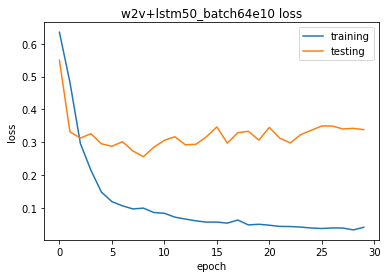

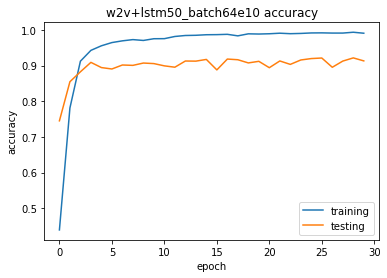

In [7]:
utils.train_test_scheme(train_dataloader, test_dataloader, model, loss_fn, opt, 
                        task_name="w2v+lstm50_batch64e10", epochs=epochs, 
                        vis=plot_yes, print_every=1, img_dir=output_dir)



In [8]:
torch.save(model.state_dict(), output_dir+"w2v_lstmlen50_batch64.pt")